# Lab 04 - Bài tập

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [2]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [62]:
# Nhìn vào đề bài ta dễ dàng thấy phân phối nhị thức 
n = 10
p = 0.25 # bởi vì có 4 phương án đúng nên tại chọn 0.25 mỗi câu 

# a. ta cần nhớ là hàm rvs là chọn ngẫu nhiên 
bi_sam_10 = binom.rvs(n, p, size=10)
# hoặc có cách này np.random.binomal
print(pd.Series(bi_sam_10).value_counts().sort_index())

# b. ta nhớ lại hàm phân phối nhị thức 
# binom.pmf
# đầu tiên ta nhớ tính là  tổng điểm muốn đạt = 4 * (số câu đúng) - 2*(số câu sai)
# 4 = 4 * x - 2 * (10 - x) 
# => x = 4
xac_xuat_dat = binom.pmf(4, n, p)
print("Xác xuất đạt 4 điểm:", xac_xuat_dat)

# c. nhớ lại công thức Ex = n * p 
#                      Varx = n * p * (1 - p)
Ex = n * p 
Varx = n * p * (1 - p)
print("Kì vọng: ", Ex)
print("Phương sai: ", Varx)



1    3
2    2
3    4
4    1
Name: count, dtype: int64
Xác xuất đạt 4 điểm: 0.14599800109863273
Kì vọng:  2.5
Phương sai:  1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [4]:
# ta nhớ lại poison 
# poisson.pmf 
landa = 3 
mot_cuoc_goi = poisson.pmf(1, landa)
hai_cuoc_goi = poisson.pmf(2, landa)
ba_cuoc_goi = poisson.pmf(3 , landa)
print("Xác xuất để trung tâm nhận được 1 cuộc gọi là: ", mot_cuoc_goi)
print("Xác xuất để trung tâm nhận được 2 cuộc gọi là: ", hai_cuoc_goi)
print("Xác xuất để trung tâm nhận được 3 cuộc gọi là: ", ba_cuoc_goi)



Xác xuất để trung tâm nhận được 1 cuộc gọi là:  0.14936120510359185
Xác xuất để trung tâm nhận được 2 cuộc gọi là:  0.22404180765538775
Xác xuất để trung tâm nhận được 3 cuộc gọi là:  0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

- a. Hãy tính tỷ lệ của mỗi loại.
- b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
- c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
- d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [5]:
# nhớ hàm phân phối chuẩn 
# norm.cdf

M = 500 
S = 4
# a 

# Loại 1 ta phải nhớ trong phân phối xác xuất chỉ có hàm tính nhỏ hơn thôi, nên ta tính được xác xuất trên 505 gam thì 
# ta cần 1 - xác xuất nhỏ hơn 505 gam 
xac_xuat_505 = norm.cdf(505, M, S)
loai1 = 1 - xac_xuat_505 
print("Xác xuất loại 1: ", loai1)

# Loại 2 ta phải nhớ trong phân phối ta lấy xác xuất nhỏ hơn 505 - xác xuất của nhỏ hơn 495 là xong 
xac_xuat_495 = norm.cdf(495, M, S)
loai2 = xac_xuat_505 - xac_xuat_495
print("Xác xuất loại 2: ", loai2)

# Loại 3 thì ta lấy xác xuất xuất 495 in ra thôi 
print("Xác xuất của loại 3: ", xac_xuat_495)


Xác xuất loại 1:  0.10564977366685535
Xác xuất loại 2:  0.7887004526662893
Xác xuất của loại 3:  0.10564977366685535


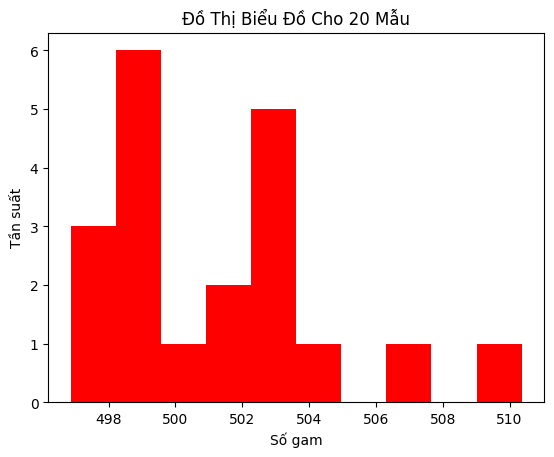

Giá trị trung bình của mẫu:  501.2988560018456
Giá trị độ lệch chuẩn của mẫu:  3.3529961090356033


In [6]:
# b 
# lấy mẫu 20 , thì ta cần nhớ cú pháp: np.random.normal(M(trung bình), S(độ lệch chuẩn), số mẫu muốn lấy)
so_mau = np.random.normal(M, S, 20)
plt.hist(so_mau, bins=10, color='red') # bins là số cột không cần cũng được 
plt.title("Đồ Thị Biểu Đồ Cho 20 Mẫu")
plt.xlabel("Số gam")
plt.ylabel("Tần suất")
plt.show()

print("Giá trị trung bình của mẫu: ", so_mau.mean())
print("Giá trị độ lệch chuẩn của mẫu: ", so_mau.std())


Nhận xét: 
- Cho thấy hầu hết số gam của trái cây nằm tập trung ở đoạn [497.5, 505,5] 
- Chỉ có một vài trường hợp ngoại lệ nằm 510.0 

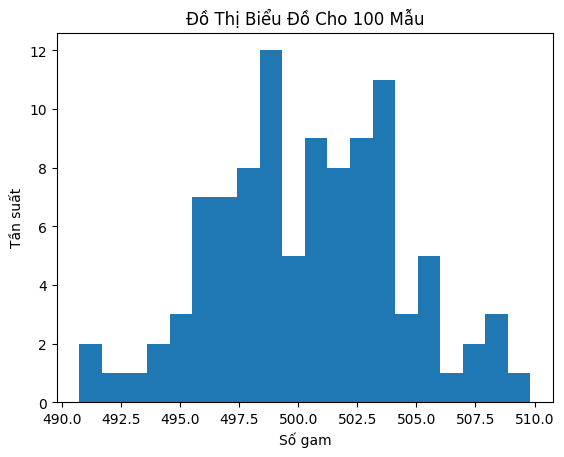

Giá trị trung bình của mẫu:  500.403488502225
Giá trị độ lệch chuẩn của mẫu:  3.912419961139505


In [7]:
so_mau = np.random.normal(M, S, 100) 
plt.hist(so_mau, bins=20)
plt.title("Đồ Thị Biểu Đồ Cho 100 Mẫu")
plt.xlabel("Số gam")
plt.ylabel("Tần suất")
plt.show()
print("Giá trị trung bình của mẫu: ", so_mau.mean())
print("Giá trị độ lệch chuẩn của mẫu: ", so_mau.std())

Nhận xét: 
- Từ biểu đồ khi xét 100 mẫu thì số gam của trái cây nằm tập trung ở đoạn [490, 507]
- Chỉ có một vài trường hợp ngoại lệ nằm ngoài khoảng

### d 
- Từ 2 biểu đồ trên khi lấy 100 mẫu thì cho thấy mức độ chính xác cao hơn và nằm rõ ràng hơn. 
- Số gam sẽ giao động [490, 507] thay vì [497.5, 505] 

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [8]:
gieo_xuc_xac = np.random.randint(1, 7, 5000) # chỉ lấy [1, 7) nên nó sẽ là [1, 6] vì con xúc xắc có 6 mặt 
# a 
xac_xuat_4 = np.sum(gieo_xuc_xac == 4) / 5000 
# b 
xac_xuat_lhhb_4 = np.sum(gieo_xuc_xac >= 4) / 5000 
# c 
xac_xuat_6 = (np.sum(gieo_xuc_xac == 6)/ 5000) / xac_xuat_lhhb_4

print("Xác xuất để số chấm xuất hiện là 4:", xac_xuat_4)
print("Xác xuất để số chấm lớn hơn hoặc bằng 4: ", xac_xuat_lhhb_4)
print("Xác xuất để số chấm bằng 6 khi biết số chấm của x >= 4: ", xac_xuat_6)


Xác xuất để số chấm xuất hiện là 4: 0.1656
Xác xuất để số chấm lớn hơn hoặc bằng 4:  0.4984
Xác xuất để số chấm bằng 6 khi biết số chấm của x >= 4:  0.3350722311396469


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

Giá trị min:  21
Giá trị max:  45
Giá trị Q1:  33.0
Giá trị Q2:  35.0
Giá trị Q3:  37.0


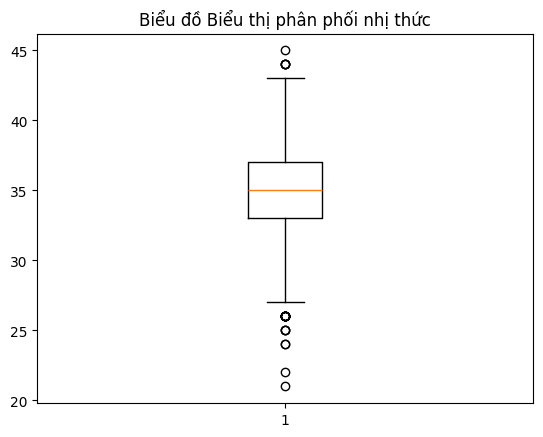

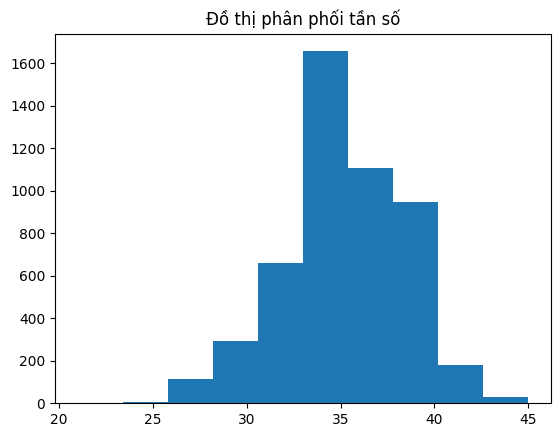

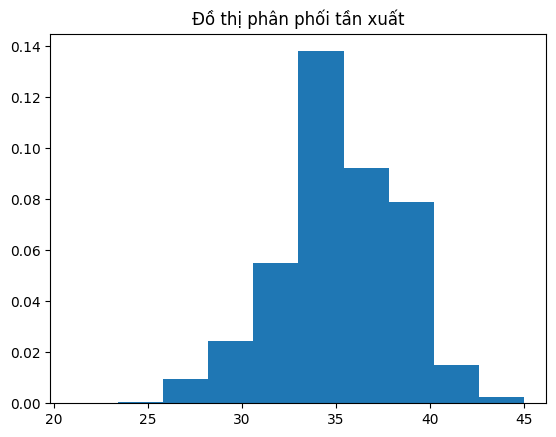

In [9]:

n = 50
p = 0.7
ngau_nhien = np.random.binomial(n, p, 5000)
# a
# lưu ý Cách để lấy Q1, Q3  cú pháp: percentile 
print("Giá trị min: ", ngau_nhien.min())
print("Giá trị max: ", ngau_nhien.max())
print("Giá trị Q1: ", np.percentile(ngau_nhien, 25))
print("Giá trị Q2: ", np.median(ngau_nhien))
print("Giá trị Q3: ", np.percentile(ngau_nhien, 75))

# b
# Vẽ đồ thị boxplot 
plt.boxplot(ngau_nhien)
plt.title("Biểu đồ Biểu thị phân phối nhị thức")
plt.show()

# c 
# tần số density = false 
# tần suất density = true (density trong tiếng việt gọi là : mật độ xác xuất)
plt.hist(ngau_nhien)
plt.title("Đồ thị phân phối tần số")
plt.show()

plt.hist(ngau_nhien, density=True)
plt.title("Đồ thị phân phối tần xuất")
plt.show()




Nhận xét: 
- Qua các biểu đồ nhận thấy giá trị tập trung ở khoảng [35, 37]

**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [14]:
# a số lượng muốn ví dụ muốn 4 lần thành công, trong 10 lần thử nghiệm, xác xuất thành công là 0.6

print(binom.pmf(4, 10, 0.6))

# b  B(10, 0.6), n = 10, p = 0.6 
print("Tính theo nhị thức")
p_nhohonhoacbang_5 = binom.cdf(5, 10, 0.6)
p_nhohonhoacbang_3 = binom.cdf(3, 10, 0.6)
p_5 = binom.pmf(5, 10, 0.6)
print("P(X <= 5) = ", p_nhohonhoacbang_5)
print("P(X >= 4) = ", 1 - p_nhohonhoacbang_3)
print("P(X = 5) = ", p_5)

# c   xác xuất 4 sự kiện xảy ra, trong khi trung bình xảy ra là 3 (landa)
print(poisson.pmf(4, 3))

# d 
print("Tính theo poisson")
landa = 3
P_NhoHonHoacBang_5 = poisson.cdf(5, landa)
P_NhoHonHoacBang_3 = poisson.cdf(3, landa)
P_LonHonHoacBang_4 = 1 - P_NhoHonHoacBang_3
P_5 = poisson.pmf(5, landa)
print("P(X <= 5) = ", P_NhoHonHoacBang_5)
print("P(X >= 4) = ", P_LonHonHoacBang_4)
print("P(X = 5) = ", P_5)

0.11147673600000009
Tính theo nhị thức
P(X <= 5) =  0.3668967424000001
P(X >= 4) =  0.9452381183999999
P(X = 5) =  0.20065812479999992
0.16803135574154085
Tính theo poisson
P(X <= 5) =  0.9160820579686966
P(X >= 4) =  0.35276811121776874
P(X = 5) =  0.10081881344492458


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

0.9772498680518208
0.8413447460685429
0.6914624612740131
2.0000000000000004
1.959963984540054
2.959963984540054
4.919927969080108
c. Giá trị PPF:
norm.ppf(0.975) = 1.9600
norm.ppf(0.975, 1, 1) = 2.9600
norm.ppf(0.975, 1, 2) = 4.9199



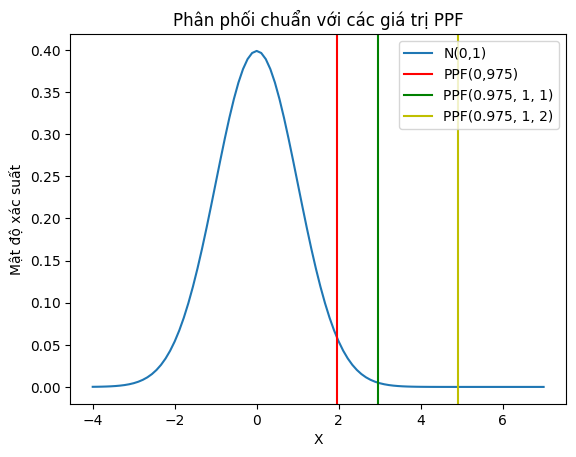

P(X <= 20) =  0.15865525393145707
P(X >= 29.5) 0.08456572235133564
P(X = 23.8) = 0


In [45]:
# a
# Norm.cdf(2) thì M = 0, Xích ma = 1 
print(norm.cdf(2))
# Norm.cdf(2, 1, 1) M = 1, xích ma = 1 
print(norm.cdf(2, 1, 1))
# Norm.cdf(2, 1, 2) M = 1, xích ma = 2 
print(norm.cdf(2, 1, 2))

#b 
# z = (x - M) / (xích ma)
print(norm.ppf(norm.cdf(2)))

# c 
print(norm.ppf(0.975)) # bỏ vào xác xuất đưa ra x 
print(norm.ppf(0.975, 1, 1)) # bỏ vào này thì ta suy ra được x 
print(norm.ppf(0.975, 1, 2))

ppf_975 = norm.ppf(0.975)
ppf_975_1_1 = norm.ppf(0.975, 1, 1)
ppf_975_1_2 = norm.ppf(0.975, 1, 2)

print("c. Giá trị PPF:")
print(f"norm.ppf(0.975) = {ppf_975:.4f}")
print(f"norm.ppf(0.975, 1, 1) = {ppf_975_1_1:.4f}")
print(f"norm.ppf(0.975, 1, 2) = {ppf_975_1_2:.4f}\n")

# Vẽ đồ thị cho câu c
x = np.linspace(-4, 7, 100)
y = norm.pdf(x) # pdf là hàm mật độ xác xuất 

plt.plot(x, y, label="N(0,1)")
plt.axvline(ppf_975, color='r',label='PPF(0,975)')
plt.axvline(ppf_975_1_1, color='g',label='PPF(0.975, 1, 1)')
plt.axvline(ppf_975_1_2, color='y',label='PPF(0.975, 1, 2)')
plt.legend()
plt.title("Phân phối chuẩn với các giá trị PPF")
plt.xlabel("X")
plt.ylabel("Mật độ xác suất")
plt.show()

# d 
# M = 24 , phương sai = 16 -> độ lệch chuẩn( xích ma) = 4 (căn bậc 2 của phương sai)
# xác xuất tại một điểm của phân phối chuẩn = 0
print("P(X <= 20) = ",norm.cdf(20, 24, 4))
print("P(X >= 29.5)", 1 - norm.cdf(29.5, 24, 4))
print("P(X = 23.8) = 0")



**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [30]:
# M = 3000, độ lệch chuẩn = 3 
P_3007 = norm.cdf(3007, 3000, 3)
P_2993 = norm.cdf(2993, 3000, 3)
print(1 - (P_3007 - P_2993))

0.01963065725729063


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

Diem trung binh: 498.32303041670076
Do lech chuan:  9.167347228777608
Q1 =  494.144192180989
Q2 =  497.74176272163265
Q3 =  502.1224650578138
Min =  476.4138932216711
Max =  517.3400762619713
Tỷ lệ đạt điểm toeic trên 450: 0.9999999997947736


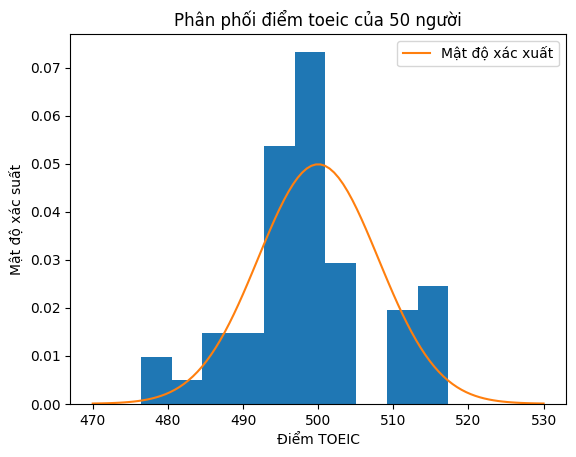

In [50]:
# M = 500, độ lệch chuẩn = 8 

# a 
diem_toeic = np.random.normal(500, 8, 50)

# b 
diem_trung_binh = diem_toeic.mean()
do_lech_chuan = diem_toeic.std()
print("Diem trung binh:", diem_trung_binh)
print("Do lech chuan: ", do_lech_chuan)


# c 
Q1 = np.percentile(diem_toeic, 25)
Q2 = np.median(diem_toeic)
Q3 = np.percentile(diem_toeic, 75)
Min_IQR = diem_toeic.min()
Max_IQR = diem_toeic.max()
print("Q1 = ", Q1) 
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("Min = ", Min_IQR)
print("Max = ", Max_IQR)

# d 
P_450 = norm.cdf(450, 500, 8)
print("Tỷ lệ đạt điểm toeic trên 450:", 1 - P_450)

#  để vẽ đồ thị mật độ phân phối chuẩn ta cần có x, y
x = np.linspace(470, 530, 100)
y = norm.pdf(x, 500, 8)

plt.hist(diem_toeic, density=True) # mật độ xác xuất nên density = true 
plt.plot(x, y, label='Mật độ xác xuất')
plt.title("Phân phối điểm toeic của 50 người")
plt.xlabel("Điểm TOEIC")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.show()


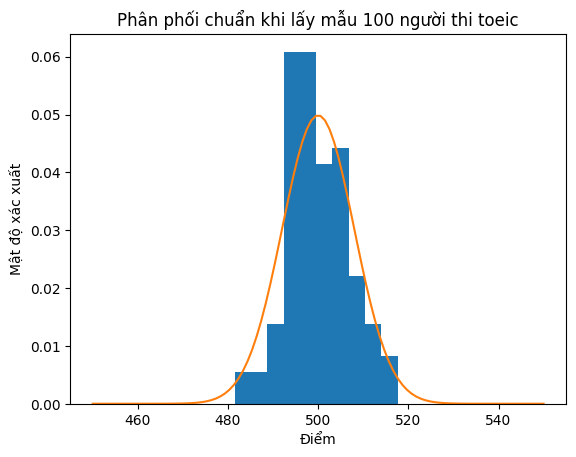

In [56]:
diem_toeic = np.random.normal(500, 8, 100)
x = np.linspace(450, 550, 100)
y = norm.pdf(x, 500, 8)
plt.hist(diem_toeic, density=True)
plt.plot(x, y)
plt.title("Phân phối chuẩn khi lấy mẫu 100 người thi toeic")
plt.xlabel("Điểm")
plt.ylabel("Mật độ xác xuất")
plt.show()

**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

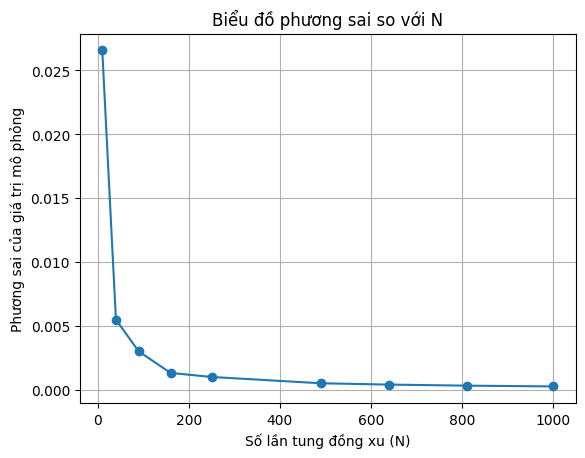

In [61]:
# Bài 10: Mô phỏng tung đồng xu và đánh giá phương sai
gia_tri_n = [10, 40, 90, 160, 250, 490, 640, 810, 1000]
phuong_sai = []
so_lan_mo_phong = 100
for n in gia_tri_n: 
    gia_tri_trung_binh_100_lan_thu = np.random.binomial(1, 0.5, (so_lan_mo_phong, n)).mean(axis=1)
    phuong_sai.append(np.var(gia_tri_trung_binh_100_lan_thu, ddof=1)) # khi sử dụng mẫu thì bậc tự do là ddof = 1 

plt.plot(gia_tri_n, phuong_sai, marker='o')
plt.xlabel("Số lần tung đồng xu (N)")
plt.ylabel("Phương sai của giá trị mô phỏng")
plt.title("Biểu đồ phương sai so với N")
plt.grid()
plt.show()

Nhận xét: 
    số lần tung đồng xu càng nhiều thì phương sai càng thấp 

---